이번에 설치해야 할 모듈은 pillow와 requests 이다.  
pillow는 파이썬에서 이미지를 핸들링하는 모듈이고, requests는 http 관련 요청을 처리하는 모듈이다.  
```
pip install pillow

pip install requests
```
설치는 쉬우나, 우리가 학습하고 있는 study36 환경을 활성화해서 그 안에서 설치해야 한다.  
(나는 vscode에서 프롬프트의 기본 프로필을 anaconda:study36으로 지정해서 바로 설치하였다.)  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

이번에 추가하는 import는 matplotlib의 image이다.  
jpg 등의 이미지 파일을 다룰 수 있는 모듈이다.  
이를 이용해서 face_detection_test_01.jpg라는 이름으로 data폴더에 저장된 이미지를 읽어보겠다.  
우리는 이 사진을 https://pxhere.com/ko/photo/950788 또는, 이 책의 github 페이지인 https://github.com/PinktWink/playing_data에서 얻을 수 있다.

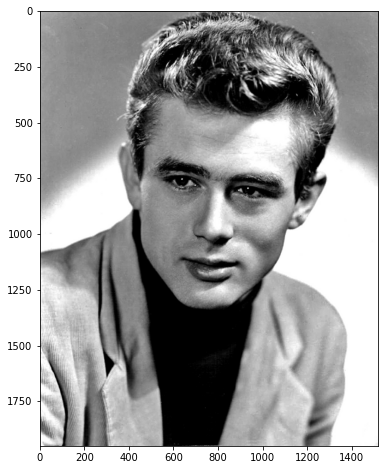

그림 5-1


In [2]:
img = mpimg.imread('./data/face_detection_test_01.jpg')

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()
print("그림 5-1")

In [3]:
import requests
client_id="fFs_uErHvCbOX3GdrzEj"
client_secret="BvThmXhJXe"

url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image' : open('./data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

4장에서 진행한 대로, client ID/secret을 설정하고, url이 닮은 유명인 찾는 url을 사용한다.  
해당 url과 사용법은 http://developers.naver.com/docs/clova/api/CFR/API_Guide.md 에 있다.  
4장의 내용과 다른 점은 인식해야 할 사진을 보내야(post) 한다는 것이다.  
그 방법은 requests의 post 기능을 이용해 사진을 보내는 것이다.  
네이버에서는 사진 한 장이 최대 2MB보다 작아야 한다.

In [4]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed, indent = 4, sort_keys = False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.264354
            }
        }
    ]
}


변수 response에 저장된 코드 3의 결과를 json으로 읽고(loads) 들여쓰기(indent)를 설정해서 dumps라는 명령을 사용하면 코드 4의 결과처럼 보기 좋게 변환해 준다.  
여기서 ensure_ascii=False를 사용하면 utf-8로 인코딩된 한글을 제대로 표시해준다.  
face_detection_test_01.jpg 사진을 네이버 유명인 인식 API에 적용한 결과는 책에서는 이병헌 배우와 17.4% 닮았다고 나왔다고 하지만, 현재 검색결과에서는 정우성 배우와 27.63% 닮았다고 나온다.  
네이버 얼굴인식에서 유명인 인식 API는 한국 유명인을 찾는다. 그래서 이렇게 결과가 타나나는 것이다.  
또 찾은 얼굴이 하나인 것도 facecount에서 나타난다.

In [5]:
#In[5]
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('./data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 467,
                "y": 617,
                "width": 678,
                "height": 678
            },
            "landmark": {
                "leftEye": {
                    "x": 634,
                    "y": 746
                },
                "rightEye": {
                    "x": 952,
                    "y": 797
                },
                "nose": {
                    "x": 760,
                    "y": 981
                },
                "leftMouth": {
                    "x": 625,
                    "y": 1105
                },
                "rightMouth": {
                    "x": 902,
                    "y": 1133
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999999
            },
       

이번에는 그냥 얼굴 인식 api를 사용해보자.  url만 바뀌는 것을 제외하면 나머지는 동일하다.  정말 상세한 정보가 나타나는 것을 알 수 있다.  
전체 사진의 크기가 발견된 얼굴의 개수, 그리고, 얼굴의 위치(roi: region of interest)와 눈, 코, 입의 위치, 성별(gender), 나이(age), 감정(gender), 각도(pose)까지 나타난다.  
face_detection_test_01.jpg 사진은 99.9%로 남성, 16.08%의 확률로 나이가 26~30세라는 것까지 나타난다.

## 5.2 파이썬 dict형 데이터와 json

파이썬 데이터형 중에 리스트(list)에 관해서는 앞에서 배웠다.  
이번에는 dict형에 관해 간단히 배우고, 이어서 json에 관한 학습을 하겠다.

In [6]:
dict_sample = {'Name' : 'pinkwink', 'Age' : 'None', 'Class' : ['beginner','blog']}
dict_sample

{'Name': 'pinkwink', 'Age': 'None', 'Class': ['beginner', 'blog']}

파이썬에서 dict형 자료라고 선언할 때는 중괄호의 콜론(:)을 이용해서 key와 value의 관계를 정의해준다.  
위 코드의 dict형은 아주 직관적이다. 이름(name)은 pinkwink이고, 나이(age)는 none이라고 정의했다.  
왼쪽이 key이고, 오른쪽이 value이다. value는 리스트형이 나올 수 있다.

In [7]:
# dict 자료에서 key만 얻고 싶으면 keys()를 사용하면 된다.
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [8]:
# values()를 이용하면 values만 확인할 수 있다.
dict_sample.values()

dict_values(['pinkwink', 'None', ['beginner', 'blog']])

In [9]:
# key를 이용해서 value를 부르는 방법은 아래 코드와 같이 손쉽게 구할 수 있다.
dict_sample['Class']

['beginner', 'blog']

In [10]:
# get() 함수를 사용해서 얻을 수도 있다.
dict_sample.get('Name')

'pinkwink'

In [11]:
# In[11]
dict_sample.get('Age','nothing')

'None'

In [12]:
# In[12]
dict_sample.get('room', 'nothing')

'nothing'

코드 11에서는 Age라는 key가 있으니, 그 값을 반환한다.  그런데 코드 12처럼 없는 key를 물어보면, 이미 지정된 다른 값을 반환하도록 할 수 있다.  
이제 dict형에 관한 설명을 마치고 json에 관해 설명하겠다. JSON은 Java Script Object Notation의 약자로 웹서버와 클라이언트 간듸 데이터 교환에 많이 사용하는 것으로 알려져 있다.  
Json의 구조는 파이썬 dict형과 닮은 구조이다.

In [13]:
#In[13] 파이썬 dict형으로 customer라는 변수를 만들고, 그 내용을 만든다.
customer = {
    'id': '0001',
    'name': '홍길동',
    'history': [
        {'date': '2019-03-01', 'log': True},
        {'date': '2019-03-02', 'log': False},
    ]
}

In [14]:
#In[14] 파이썬 dict형 데이터에 json.dumps를 사용하면 json 데이터가 된다.
import json
json_test = json.dumps(customer, indent=4, ensure_ascii=False)
print(json_test)

{
    "id": "0001",
    "name": "홍길동",
    "history": [
        {
            "date": "2019-03-01",
            "log": true
        },
        {
            "date": "2019-03-02",
            "log": false
        }
    ]
}


## 5.3 인식된 얼굴 사진에 정보 표시하기

코드 5에서 그림 5-1의 사진에 대해 성별과 나이, 감정 등의 정보를 표시해 보려고 한다.

In [15]:
#In [15]
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('./data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

detect_result = json.loads(response.text)

코드 15는 코드 5를 그대로 가져왔다.  
다만 마지막 결과를 저장하는 변수는 detect_result라고 했다.

In [16]:
#In [16]
detect_result.keys()

dict_keys(['info', 'faces'])

detect_result는 dict형태로 keys()를 보면 info, faces이다.

In [17]:
#In [17]
detect_result['faces']

[{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
  'landmark': {'leftEye': {'x': 634, 'y': 746},
   'rightEye': {'x': 952, 'y': 797},
   'nose': {'x': 760, 'y': 981},
   'leftMouth': {'x': 625, 'y': 1105},
   'rightMouth': {'x': 902, 'y': 1133}},
  'gender': {'value': 'male', 'confidence': 0.999999},
  'age': {'value': '26~30', 'confidence': 0.160886},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]

검출된 얼굴이 하나여서 코드 17의 faces 항목은 리스트형이지만, 그 내용은 하나이다.  
여러 얼굴을 검출하는 것은 다음 절에서 해보겠다.

In [18]:
#In[18] 코드 17의 결과는 데이터형으로는 (비록 크기가 1이지만) 리스트형이어서 0번째라고 한 단계 더 진입해야 한다.
detect_result['faces'][0]

{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
 'landmark': {'leftEye': {'x': 634, 'y': 746},
  'rightEye': {'x': 952, 'y': 797},
  'nose': {'x': 760, 'y': 981},
  'leftMouth': {'x': 625, 'y': 1105},
  'rightMouth': {'x': 902, 'y': 1133}},
 'gender': {'value': 'male', 'confidence': 0.999999},
 'age': {'value': '26~30', 'confidence': 0.160886},
 'emotion': {'value': 'neutral', 'confidence': 0.999995},
 'pose': {'value': 'frontal_face', 'confidence': 0.995792}}

In [19]:
#In[19]
detect_result['faces'][0]['roi']

{'x': 467, 'y': 617, 'width': 678, 'height': 678}

거기서 roi 항목을 보면 검출된 얼굴이 존재하는 x,y 좌표와 너비와 높이 정보가 나타난다.  
나중에 얼굴이 보이는 곳에 박스를 그릴 때 사용하려고 한다.

In [20]:
#In[20]
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999999}

그리고 성별을 얻을 수 있다.  
value는 남(male)/여(female)에 대한 정보이고, confidence는 확률이다.

In [21]:
#In[21]
detect_result['faces'][0]['age']

{'value': '26~30', 'confidence': 0.160886}

나이에 대한 정보도 얻을 수 있다.

In [22]:
#In[22]
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999995}

감정에 대한 정보도 얻을 수 있다.

In [23]:
#In[23]
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

코드 20부터 22까지를 코드 23에서 변수로 받는 것까지 한번에 정리했다. values()를 이용해서 값만 받고, 그 값을 개수에 맞춰 각 변수에 저장했다.  
여기서 keys()와 values()의 값 순서를 확인해야 한다. 예를 들어, 코드 19의 결과가 x, y, width, height가 아니라 width, height, x, y의 순서로 나온다면, 코드 23의 첫 행의 x, y, w, h는 w, h, x, y로 변경해야 한다.

In [24]:
#In[24]
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.999999
neutral : 0.999995
26~30 : 0.160886


그리고 코드23의 정보를 사진에 표시하기 위해 annotation 변수에 저장한다.  
여기서 '\n'기호는 코드를 작성할 때의 줄을 바꾸기 위한 기호로, 여러분들은  
``` annotation = gender + ' : ' + str(gen_confidence) + '\n' + emotion + ' : ' + str(emotion_confidence) + '\n' + age + ' : ' + str(age_confidence) ```  
라고 한 줄로 입력해도 된다. 코드 24에 있는 '\n'도 줄바꿈 문자이다.  
코드 25에서 import한 matplotlib.patches는 jpg 등의 형식으로 된 사진에 추가로 박스나 원 등의 도형을 그릴 수 있게 도와주는 모듈이다.

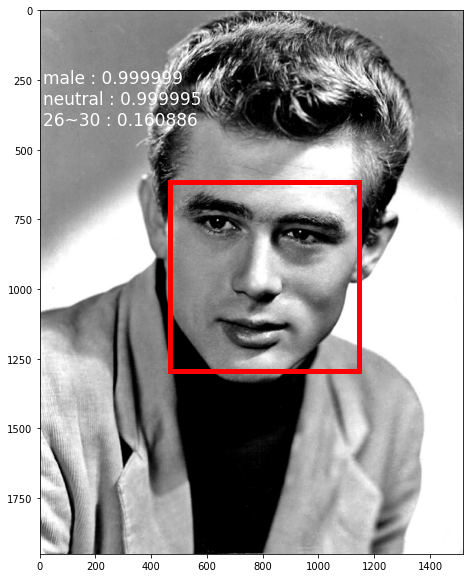

In [25]:
#In[25]

import matplotlib.patches as patches

img = mpimg.imread('./data/face_detection_test_01.jpg')

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y), w, h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)
plt.text(10, 400, annotation, wrap=True, fontsize=17, color = 'white')
plt.show()

patches의 Rectangle 함수를 사용해서 사진에 박스를 그릴 수 있다. 필요한 정보는 코드 25에 입력했듯이, 선의 굵기(linewidth), 테두리 색(edgecolor), 채움 색(facecolor) 등이다.  
그리고, plt.text는 그림에 글자를 입력하는 함수로, 코드 24에서 만들어 둔 정보를 출력한다.

## 5.4 여러 얼굴이 있는 사진에 대한 정보 표시하기

이번에는 https://pxhere.com/ko/photo/1153438에서 저작권에 문제가 없는 가족사진 하나를 가져오자.  
<img src="./data/face_detection_test_02.jpg" width="680">

In [26]:
#In[26]
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

detect_result = json.loads(response.text)

그림 5-3의 사진을 data 폴더에 face_detection_test_02.jpg라는 이름으로 저장하고 코드 26을 실행한다.

In [27]:
#In[27]
detect_result

{'info': {'size': {'width': 1868, 'height': 1245}, 'faceCount': 3},
 'faces': [{'roi': {'x': 833, 'y': 448, 'width': 211, 'height': 211},
   'landmark': {'leftEye': {'x': 889, 'y': 514},
    'rightEye': {'x': 977, 'y': 509},
    'nose': {'x': 929, 'y': 548},
    'leftMouth': {'x': 890, 'y': 599},
    'rightMouth': {'x': 976, 'y': 598}},
   'gender': {'value': 'child', 'confidence': 0.999999},
   'age': {'value': '0~2', 'confidence': 1.0},
   'emotion': {'value': 'laugh', 'confidence': 0.998361},
   'pose': {'value': 'frontal_face', 'confidence': 0.999811}},
  {'roi': {'x': 408, 'y': 371, 'width': 269, 'height': 269},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.991298},
   'age': {'value': '17~21', 'confidence': 0.0400235},
   'emotion': {'value': 'laugh', 'confidence': 0.999307},
   'pose': {'value': 'part_face', 'confidence': 0.677373}},
  {'roi': {'x': 1114, 'y': 373, 'width': 236, 'height': 236},
   'landmark': None,
   'gender': {'value': 'female', 'confid

결과를 보니 총 세 개의 얼굴을 확인했다.  
이제 코드 15의 결과인 코드 17처럼 얼굴이 하나여서 생각하지 않았던 문제를 고민해야 한다.  
다수의 얼굴에 원하는 정보를 표시하려면 반복문이 필요하다는 것이다.  
코드 17의 정보는 각 얼굴 정보마다 있다.  
그래서 for문을 사용할 때 in 뒤에는 detect_result['faces']를 사용한다.

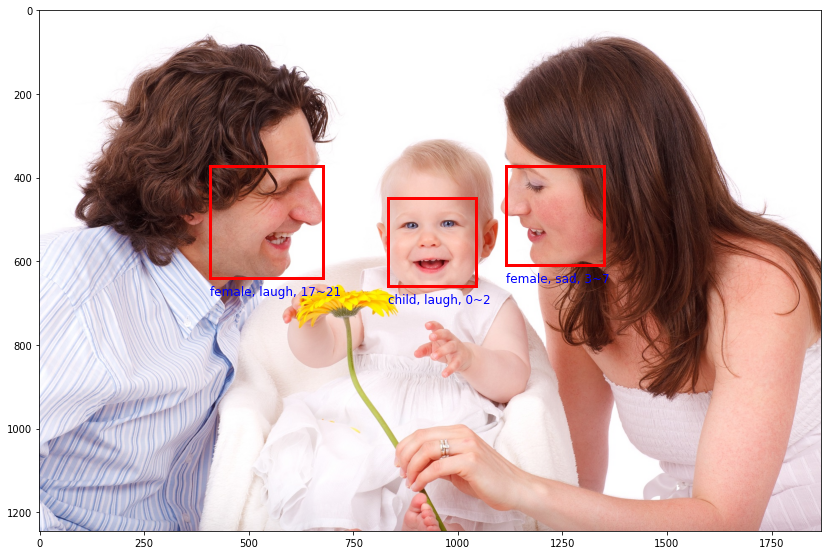

In [28]:
#In [28]
img = mpimg.imread('./data/face_detection_test_02.jpg')
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x, y + h + 40, ant_letter, size=12, color='blue')
    ax.add_patch(rect_face)

plt.show()

In [29]:
#In[26]
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/sample1.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)

detect_result = json.loads(response.text)

In [30]:
detect_result

{'info': {'size': {'width': 1824, 'height': 1368}, 'faceCount': 10},
 'faces': [{'roi': {'x': 1348, 'y': 642, 'width': 329, 'height': 329},
   'landmark': {'leftEye': {'x': 1427, 'y': 727},
    'rightEye': {'x': 1577, 'y': 721},
    'nose': {'x': 1466, 'y': 812},
    'leftMouth': {'x': 1415, 'y': 877},
    'rightMouth': {'x': 1574, 'y': 883}},
   'gender': {'value': 'male', 'confidence': 0.999994},
   'age': {'value': '28~32', 'confidence': 0.431011},
   'emotion': {'value': 'smile', 'confidence': 0.99634},
   'pose': {'value': 'frontal_face', 'confidence': 0.993164}},
  {'roi': {'x': 950, 'y': 679, 'width': 178, 'height': 178},
   'landmark': {'leftEye': {'x': 986, 'y': 715},
    'rightEye': {'x': 1057, 'y': 714},
    'nose': {'x': 1006, 'y': 760},
    'leftMouth': {'x': 990, 'y': 801},
    'rightMouth': {'x': 1057, 'y': 794}},
   'gender': {'value': 'female', 'confidence': 0.998173},
   'age': {'value': '27~31', 'confidence': 0.274683},
   'emotion': {'value': 'neutral', 'confidence'

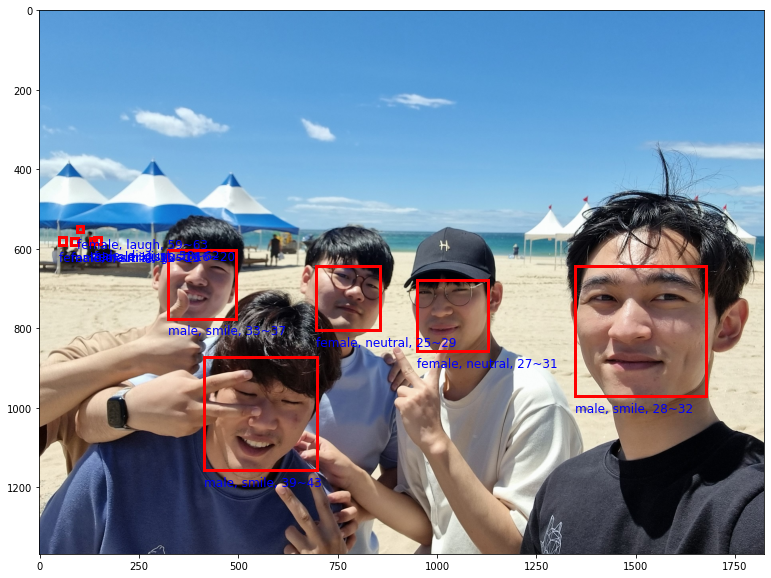

In [31]:
#In [28]
img = mpimg.imread('./data/sample1.jpg')
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x, y + h + 40, ant_letter, size=12, color='blue')
    ax.add_patch(rect_face)

plt.show()